In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Define paths
base_dir = '/content/drive/MyDrive/ML_project'  # Change this to a directory within your Google Drive
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')

# List of classes
classes = ['Healthy', 'Brain_Tumor']

# Function to count images
def count_images(directory, classes):
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.exists(class_dir):
            counts[class_name] = len(os.listdir(class_dir))
        else:
            counts[class_name] = 0
    return counts

# Count the number of images in the training, validation, and unseen sets
train_counts = count_images(train_dir, classes)
validation_counts = count_images(validation_dir, classes)
test_counts = count_images(test_dir, classes)

print("Training set counts:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count} images")

print("\nValidation set counts:")
for class_name, count in validation_counts.items():
    print(f"{class_name}: {count} images")

print("\nUnseen set counts:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count} images")

Training set counts:
Healthy: 1669 images
Brain_Tumor: 2010 images

Validation set counts:
Healthy: 208 images
Brain_Tumor: 251 images

Unseen set counts:
Healthy: 210 images
Brain_Tumor: 252 images


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Combine base model with custom layers
model_vgg_25 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_vgg_25.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hst_vgg_25=model_vgg_25.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = model_vgg_25.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/25
115/115 [==============================] - 907s 8s/step - loss: 0.5021 - accuracy: 0.7478 - val_loss: 0.3508 - val_accuracy: 0.8540
Epoch 2/25
115/115 [==============================] - 43s 374ms/step - loss: 0.3901 - accuracy: 0.8217 - val_loss: 0.3099 - val_accuracy: 0.8736
Epoch 3/25
115/115 [==============================] - 42s 367ms/step - loss: 0.3628 - accuracy: 0.8445 - val_loss: 0.2888 - val_accuracy: 0.8932
Epoch 4/25
115/115 [==============================] - 45s 390ms/step - loss: 0.3056 - accuracy: 0.8739 - val_loss: 0.2734 - val_accuracy: 0.8954
Epoch 5/25
115/115 [==============================] - 44s 383ms/step - loss: 0.2979 - accuracy: 0.8731 - val_loss: 0.2689 - val_accuracy: 0.8889
Epoch 6/25
115/115 [==============================] - 42s 361ms/step - loss: 0.2828 - ac

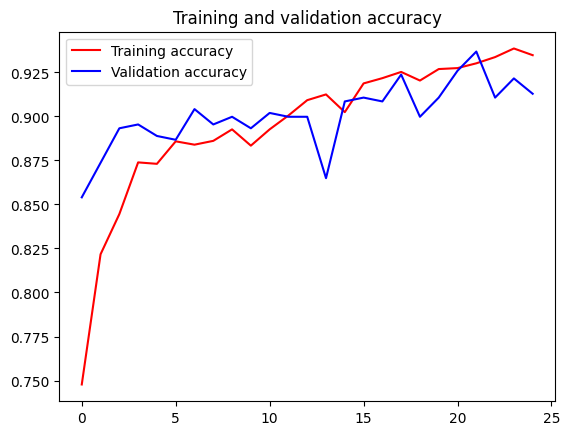

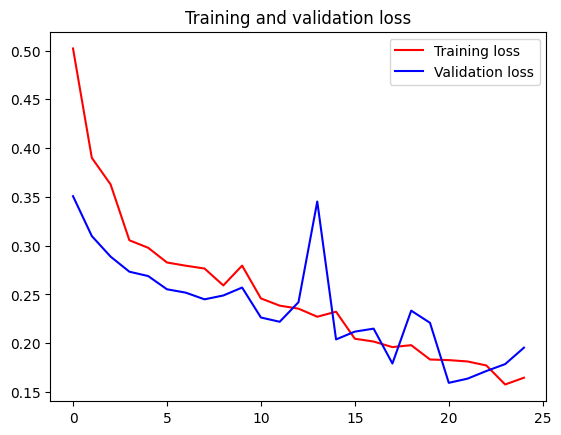

14/14 [==============================] - 2s 155ms/step - loss: 0.1946 - accuracy: 0.9129
Final validation accuracy: 0.9129
Final validation loss: 0.1946


In [ ]:
# Evaluate the model
acc = hst_vgg_25.history['accuracy']
val_acc = hst_vgg_25.history['val_accuracy']
loss = hst_vgg_25.history['loss']
val_loss = hst_vgg_25.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = model_vgg_25.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

15/15 [==============================] - 153s 11s/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.97      0.87      0.92       252
     Healthy       0.86      0.97      0.91       210

    accuracy                           0.92       462
   macro avg       0.92      0.92      0.92       462
weighted avg       0.92      0.92      0.92       462

Confusion Matrix
[[219  33]
 [  6 204]]


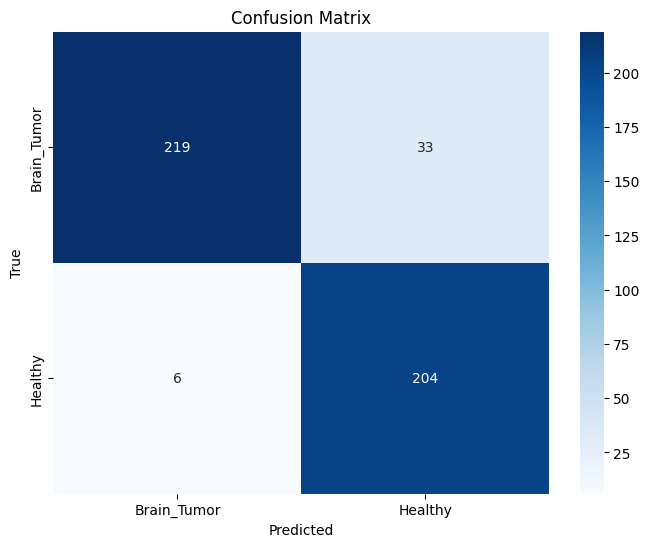

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = model_vgg_25.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/ML_VGG16_25.h5'
model_vgg_25.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Combine base model with custom layers
model_vgg_50 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_vgg_50.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hst_vgg_50=model_vgg_50.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = model_vgg_50.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
115/115 [==============================] - 971s 8s/step - loss: 0.4809 - accuracy: 0.7630 - val_loss: 0.3863 - val_accuracy: 0.8322
Epoch 2/50
115/115 [==============================] - 41s 359ms/step - loss: 0.3656 - accuracy: 0.8366 - val_loss: 0.3068 - val_accuracy: 0.8693
Epoch 3/50
115/115 [==============================] - 41s 358ms/step - loss: 0.3549 - accuracy: 0.8437 - val_loss: 0.2908 - val_accuracy: 0.8802
Epoch 4/50
115/115 [==============================] - 41s 355ms/step - loss: 0.3239 - accuracy: 0.8595 - val_loss: 0.2956 - val_accuracy: 0.8824
Epoch 5/50
115/115 [==============================] - 41s 357ms/step - loss: 0.3232 - accuracy: 0.8638 - val_loss: 0.2638 - val_accuracy: 0.8954
Epoch 6/50
115/115 [==============================] - 40s 350ms/step - loss: 0.2836 - ac

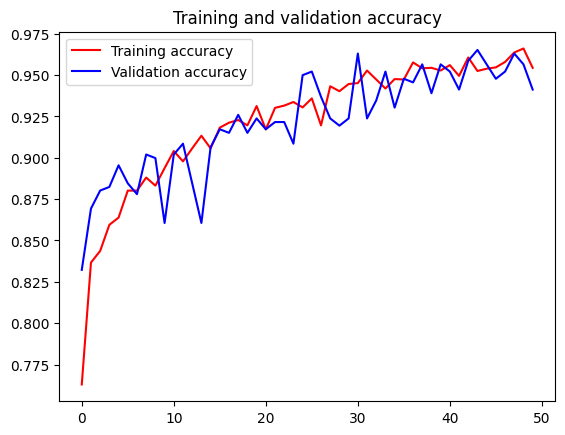

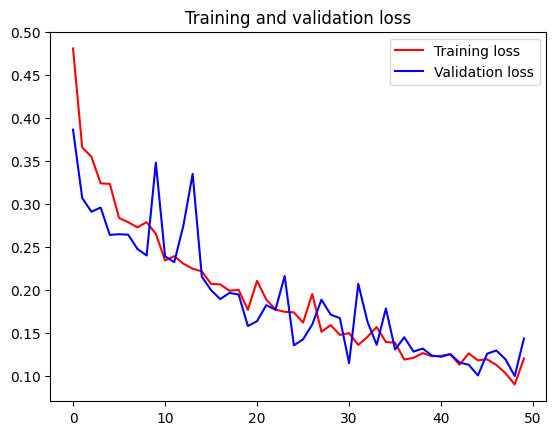

14/14 [==============================] - 3s 184ms/step - loss: 0.1450 - accuracy: 0.9397
Final validation accuracy: 0.9397
Final validation loss: 0.1450


In [ ]:
# Evaluate the model
acc = hst_vgg_50.history['accuracy']
val_acc = hst_vgg_50.history['val_accuracy']
loss = hst_vgg_50.history['loss']
val_loss = hst_vgg_50.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = model_vgg_50.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

15/15 [==============================] - 130s 9s/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.96      0.93      0.95       252
     Healthy       0.92      0.95      0.94       210

    accuracy                           0.94       462
   macro avg       0.94      0.94      0.94       462
weighted avg       0.94      0.94      0.94       462

Confusion Matrix
[[235  17]
 [ 10 200]]


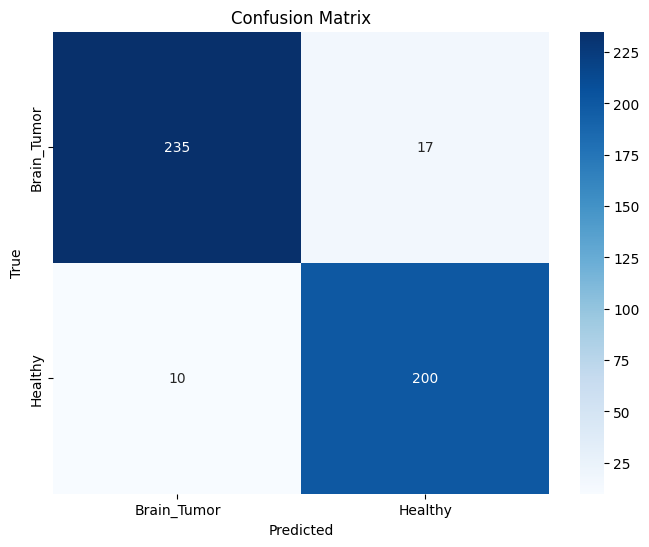

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = model_vgg_50.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/ML_VGG16_50.h5'
model_vgg_50.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Combine base model with custom layers
model_vgg_50_lr = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_vgg_50_lr.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
hst_vgg_50_lr=model_vgg_50_lr.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = model_vgg_50_lr.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/50
115/115 [==============================] - 1630s 14s/step - loss: 0.6246 - accuracy: 0.6716 - val_loss: 0.5234 - val_accuracy: 0.7800
Epoch 2/50
115/115 [==============================] - 43s 370ms/step - loss: 0.5291 - accuracy: 0.7548 - val_loss: 0.4567 - val_accuracy: 0.8170
Epoch 3/50
115/115 [==============================] - 42s 364ms/step - loss: 0.4802 - accuracy: 0.7880 - val_loss: 0.4163 - val_accuracy: 0.8257
Epoch 4/50
115/115 [==============================] - 44s 383ms/step - loss: 0.4432 - accuracy: 0.8018 - val_loss: 0.3844 - val_accuracy: 0.8431
Epoch 5/50
115/115 [==============================] - 42s 364ms/step - loss: 0.4192 - accuracy: 0.8239 - val_loss: 0.3684 - val_accuracy: 0.8540
Epoch 6/50
115/115 [==============================] - 42s 366ms/step - loss: 0.3881 - 

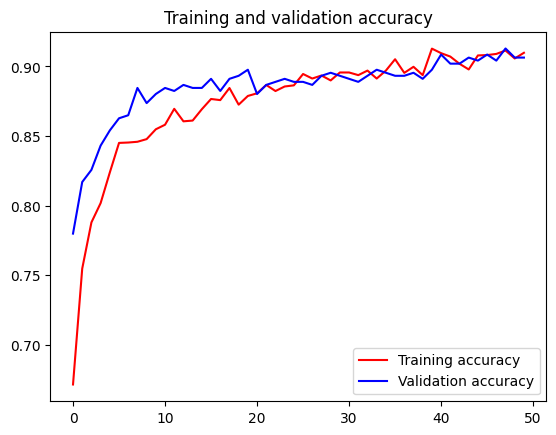

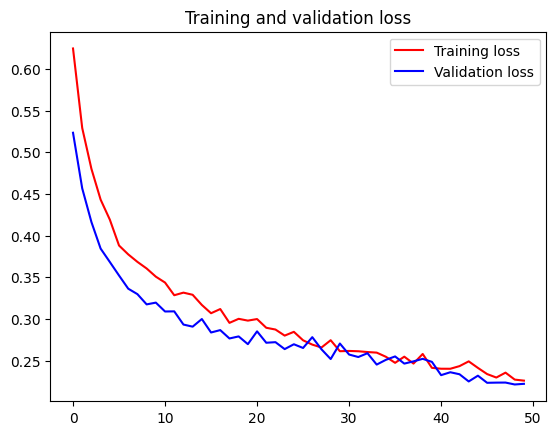

14/14 [==============================] - 2s 149ms/step - loss: 0.2247 - accuracy: 0.9062
Final validation accuracy: 0.9062
Final validation loss: 0.2247


In [5]:
# Evaluate the model
acc = hst_vgg_50_lr.history['accuracy']
val_acc = hst_vgg_50_lr.history['val_accuracy']
loss = hst_vgg_50_lr.history['loss']
val_loss = hst_vgg_50_lr.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = model_vgg_50_lr.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

15/15 [==============================] - 322s 23s/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.95      0.89      0.92       252
     Healthy       0.88      0.94      0.91       210

    accuracy                           0.91       462
   macro avg       0.91      0.91      0.91       462
weighted avg       0.91      0.91      0.91       462

Confusion Matrix
[[224  28]
 [ 13 197]]


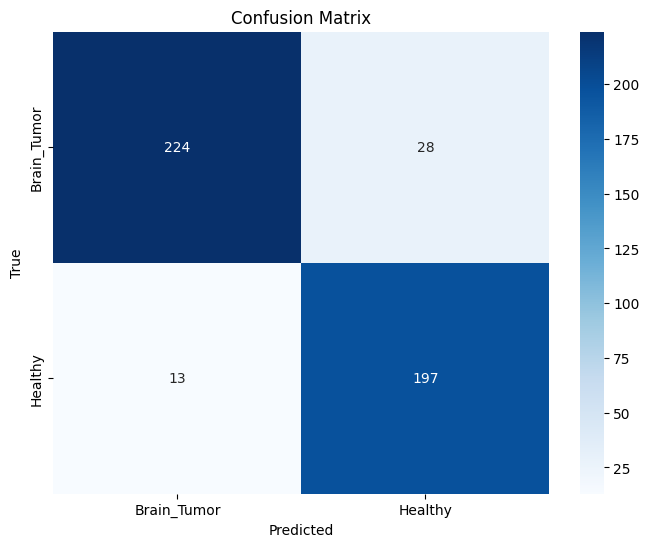

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = model_vgg_50_lr.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()